In [1]:
import pandas as pd
import re
import nltk 
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import nltk 
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.sentiment import SentimentIntensityAnalyzer

from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

import unicodedata
import contractions
import string
#Gensim
import gensim
import gensim.corpora as corpora
#spacy
import spacy
#vis
import pyLDAvis
import pyLDAvis.gensim_models

In [2]:
#Read data
waitrose = pd.read_json('waitrose.json')
waitrose.head()

created_at                   id               id_str  \
0 2020-07-29 10:28:58  1288421250000000000  1288421250000000000   
1 2020-11-17 16:31:19  1328737494000000000  1328737494000000000   
2 2020-02-28 20:19:01  1233486785000000000  1233486785000000000   
3 2020-11-13 09:21:04  1327179666000000256  1327179666000000256   
4 2020-06-04 20:54:01  1268647218000000000  1268647218000000000   

                                                text  \
0  RT @HelpThemHelpUs_: Our friends at @Potsandco...   
1  @HOOODINIIII @roh17h @Samuel51 @sainsburys @Ma...   
2  @waitrose the wine you delivered yesterday was...   
3  RT @jlandpartners: This Christmas we want to #...   
4  RT @RebeccaTillett1: @waitrose if the U.K. ach...   

                                              source  truncated  \
0  <a href="http://twitter.com/download/iphone" r...      False   
1  <a href="http://twitter.com/download/iphone" r...      False   
2  <a href="http://twitter.com/download/iphone" r...      False   
3  <a href="http://twitter.com/download/iphone" r...      False   
4  <a href="http://twitter.com/download/android" ...      False   

   in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  \
0                    NaN                        NaN                  NaN   
1           1.328654e+18               1.328654e+18         1.327758e+18   
2                    NaN                        NaN         4.632874e+07   
3                    NaN                        NaN                  NaN   
4                    NaN                        NaN                  NaN   

   in_reply_to_user_id_str  ...   matching_rules display_text_range  \
0                      NaN  ...  [{'tag': None}]               None   
1             1.327758e+18  ...  [{'tag': None}]          [57, 133]   
2             4.632874e+07  ...  [{'tag': None}]               None   
3                      NaN  ...  [{'tag': None}]               None   
4                      NaN  ...  [{'tag': None}]               None   

                                    retweeted_status possibly_sensitive  \
0  {'created_at': 'Tue Jul 28 16:29:56 +0000 2020...                NaN   
1                                               None                NaN   
2                                               None                NaN   
3  {'created_at': 'Fri Nov 13 07:00:00 +0000 2020...                NaN   
4  {'created_at': 'Thu Jun 04 16:31:25 +0000 2020...                NaN   

  quoted_status_id  quoted_status_id_str  quoted_status  \
0              NaN                   NaN           None   
1              NaN                   NaN           None   
2              NaN                   NaN           None   
3              NaN                   NaN           None   
4              NaN                   NaN           None   

  quoted_status_permalink  extended_entities  scopes  
0                    None               None     NaN  
1                    None               None     NaN  
2                    None               None     NaN  
3                    None               None     NaN  
4                    None               None     NaN  

[5 rows x 37 columns]

In [3]:
#Descriptive statistics
waitrose_m = waitrose[['quote_count','reply_count','retweet_count','favorite_count','possibly_sensitive']]
waitrose_m.describe()

quote_count   reply_count  retweet_count  favorite_count  \
count  24802.000000  24802.000000   24802.000000    24802.000000   
mean       0.057012      0.375091       0.345617        2.191114   
std        2.185681      4.713499       9.277134       55.406084   
min        0.000000      0.000000       0.000000        0.000000   
25%        0.000000      0.000000       0.000000        0.000000   
50%        0.000000      0.000000       0.000000        0.000000   
75%        0.000000      0.000000       0.000000        1.000000   
max      313.000000    600.000000     920.000000     6141.000000   

       possibly_sensitive  
count         4718.000000  
mean             0.014625  
std              0.120058  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
max              1.000000

In [4]:
waitrose_1 = waitrose[['text']]
waitrose_1

text
0      RT @HelpThemHelpUs_: Our friends at @Potsandco...
1      @HOOODINIIII @roh17h @Samuel51 @sainsburys @Ma...
2      @waitrose the wine you delivered yesterday was...
3      RT @jlandpartners: This Christmas we want to #...
4      RT @RebeccaTillett1: @waitrose if the U.K. ach...
...                                                  ...
24797  @YummyTim @Wine_and_Rugby @UKHospKate @waitros...
24798  RT @SAMPAuk_: @JoJomorris1 @waitrose @Tesco @M...
24799  @TeaTrayThomas @NHSuk @sainsburys @Tesco @asda...
24800  I signed the open letter asking @Tesco @asda @...
24801  Complex, fruity with a smoky finish says @wait...

[24802 rows x 1 columns]

In [5]:
# Cleaning and removing the above stop words list from the tweet text
stop_words = stopwords.words('english')
# new_stopwords = ["all", "due", "to", "on", "daily"]
# stpwrd.extend(new_stopwords)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

waitrose_1['text'] = waitrose_1['text'].apply(lambda text: cleaning_stopwords(text))
waitrose_1['text'].head()

C:\Users\ziyuxiong\AppData\Local\Temp\ipykernel_11912\2340962012.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waitrose_1['text'] = waitrose_1['text'].apply(lambda text: cleaning_stopwords(text))


0    RT @HelpThemHelpUs_: Our friends @Potsandco pu...
1    @HOOODINIIII @roh17h @Samuel51 @sainsburys @Ma...
2    @waitrose wine delivered yesterday made violen...
3    RT @jlandpartners: This Christmas want #GiveAL...
4    RT @RebeccaTillett1: @waitrose U.K. achieves t...
Name: text, dtype: object

In [6]:
# Remove URLs
def remove_URLs(data):
    return re.sub('((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)',' ',data)

waitrose_1['text'] = waitrose_1['text'].apply(lambda x: remove_URLs(x))
waitrose_1['text'].head()

<>:3: DeprecationWarning: invalid escape sequence '\.'
<>:3: DeprecationWarning: invalid escape sequence '\.'
C:\Users\ziyuxiong\AppData\Local\Temp\ipykernel_11912\4121499163.py:3: DeprecationWarning: invalid escape sequence '\.'
  return re.sub('((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)',' ',data)
C:\Users\ziyuxiong\AppData\Local\Temp\ipykernel_11912\4121499163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waitrose_1['text'] = waitrose_1['text'].apply(lambda x: remove_URLs(x))


0    RT @HelpThemHelpUs_: Our friends @Potsandco pu...
1    @HOOODINIIII @roh17h @Samuel51 @sainsburys @Ma...
2    @waitrose wine delivered yesterday made violen...
3    RT @jlandpartners: This Christmas want #GiveAL...
4    RT @RebeccaTillett1: @waitrose U.K. achieves t...
Name: text, dtype: object

In [7]:
# Remove punctuations
def remove_punctuations(data):
    return re.sub(r"[~.,%/:;?_&+*=!-]"," ",data)

waitrose_1['text']= waitrose_1['text'].apply(lambda x: remove_punctuations(x))
waitrose_1['text'].head()

C:\Users\ziyuxiong\AppData\Local\Temp\ipykernel_11912\4094225532.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waitrose_1['text']= waitrose_1['text'].apply(lambda x: remove_punctuations(x))


0    RT @HelpThemHelpUs   Our friends @Potsandco pu...
1    @HOOODINIIII @roh17h @Samuel51 @sainsburys @Ma...
2    @waitrose wine delivered yesterday made violen...
3    RT @jlandpartners  This Christmas want #GiveAL...
4    RT @RebeccaTillett1  @waitrose U K  achieves t...
Name: text, dtype: object

In [8]:
# Remove numbers
def remove_numbers(data):
    return re.sub('[0-9]+', '', data)

waitrose_1['text'] = waitrose_1['text'].apply(lambda x: remove_numbers(x))
waitrose_1['text'].head()

C:\Users\ziyuxiong\AppData\Local\Temp\ipykernel_11912\145371379.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waitrose_1['text'] = waitrose_1['text'].apply(lambda x: remove_numbers(x))


0    RT @HelpThemHelpUs   Our friends @Potsandco pu...
1    @HOOODINIIII @rohh @Samuel @sainsburys @Malcol...
2    @waitrose wine delivered yesterday made violen...
3    RT @jlandpartners  This Christmas want #GiveAL...
4    RT @RebeccaTillett  @waitrose U K  achieves tr...
Name: text, dtype: object

In [9]:
#Stemming
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
waitrose_1['text']= waitrose_1['text'].apply(lambda x: stemming_on_text(x))

#Lemmatization
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
waitrose_1['text'] = waitrose_1['text'].apply(lambda x: lemmatizer_on_text(x))

waitrose_1.head()

C:\Users\ziyuxiong\AppData\Local\Temp\ipykernel_11912\1055361389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waitrose_1['text']= waitrose_1['text'].apply(lambda x: stemming_on_text(x))
C:\Users\ziyuxiong\AppData\Local\Temp\ipykernel_11912\1055361389.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waitrose_1['text'] = waitrose_1['text'].apply(lambda x: lemmatizer_on_text(x))


text
0  RT @HelpThemHelpUs   Our friends @Potsandco pu...
1  @HOOODINIIII @rohh @Samuel @sainsburys @Malcol...
2  @waitrose wine delivered yesterday made violen...
3  RT @jlandpartners  This Christmas want #GiveAL...
4  RT @RebeccaTillett  @waitrose U K  achieves tr...

In [10]:
# Download VADER Dictionary
nltk.download('vader_lexicon')

# Import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer

# Creating an Analyzer
sia = SentimentIntensityAnalyzer()
waitrose_1['polarity_scores'] = waitrose_1['text'].apply(sia.polarity_scores)
waitrose_1.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ziyuxiong\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\ziyuxiong\AppData\Local\Temp\ipykernel_11912\410043667.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waitrose_1['polarity_scores'] = waitrose_1['text'].apply(sia.polarity_scores)


text  \
0  RT @HelpThemHelpUs   Our friends @Potsandco pu...   
1  @HOOODINIIII @rohh @Samuel @sainsburys @Malcol...   
2  @waitrose wine delivered yesterday made violen...   
3  RT @jlandpartners  This Christmas want #GiveAL...   
4  RT @RebeccaTillett  @waitrose U K  achieves tr...   

                                     polarity_scores  
0  {'neg': 0.0, 'neu': 0.421, 'pos': 0.579, 'comp...  
1  {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...  
2  {'neg': 0.587, 'neu': 0.413, 'pos': 0.0, 'comp...  
3  {'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'comp...  
4  {'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'comp...

In [11]:
waitrose_1.head()

text  \
0  RT @HelpThemHelpUs   Our friends @Potsandco pu...   
1  @HOOODINIIII @rohh @Samuel @sainsburys @Malcol...   
2  @waitrose wine delivered yesterday made violen...   
3  RT @jlandpartners  This Christmas want #GiveAL...   
4  RT @RebeccaTillett  @waitrose U K  achieves tr...   

                                     polarity_scores  
0  {'neg': 0.0, 'neu': 0.421, 'pos': 0.579, 'comp...  
1  {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...  
2  {'neg': 0.587, 'neu': 0.413, 'pos': 0.0, 'comp...  
3  {'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'comp...  
4  {'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'comp...

In [12]:
#Labelling data with sentiment
def label_sentiment(row):
    # Get compound score
    compound_score = row['polarity_scores']['compound']
    if compound_score > 0.05:
        return 'Positive'
    elif compound_score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'
    
# create a new column
waitrose_1['sentiment'] = waitrose_1.apply(label_sentiment, axis=1)

# Print DataFrame
waitrose_1.head()

C:\Users\ziyuxiong\AppData\Local\Temp\ipykernel_11912\2942461139.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waitrose_1['sentiment'] = waitrose_1.apply(label_sentiment, axis=1)


text  \
0  RT @HelpThemHelpUs   Our friends @Potsandco pu...   
1  @HOOODINIIII @rohh @Samuel @sainsburys @Malcol...   
2  @waitrose wine delivered yesterday made violen...   
3  RT @jlandpartners  This Christmas want #GiveAL...   
4  RT @RebeccaTillett  @waitrose U K  achieves tr...   

                                     polarity_scores sentiment  
0  {'neg': 0.0, 'neu': 0.421, 'pos': 0.579, 'comp...  Positive  
1  {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...  Positive  
2  {'neg': 0.587, 'neu': 0.413, 'pos': 0.0, 'comp...  Negative  
3  {'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'comp...  Positive  
4  {'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'comp...  Positive

Text(0.5, 1.0, 'Sentiment Data Distribution')

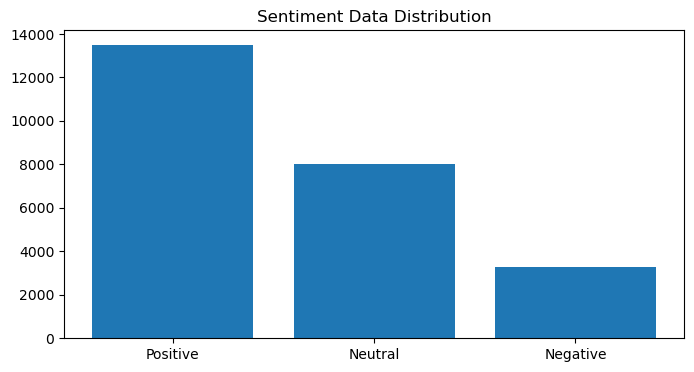

In [13]:
#Sentiment Data Distribution#
val_count = waitrose_1.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

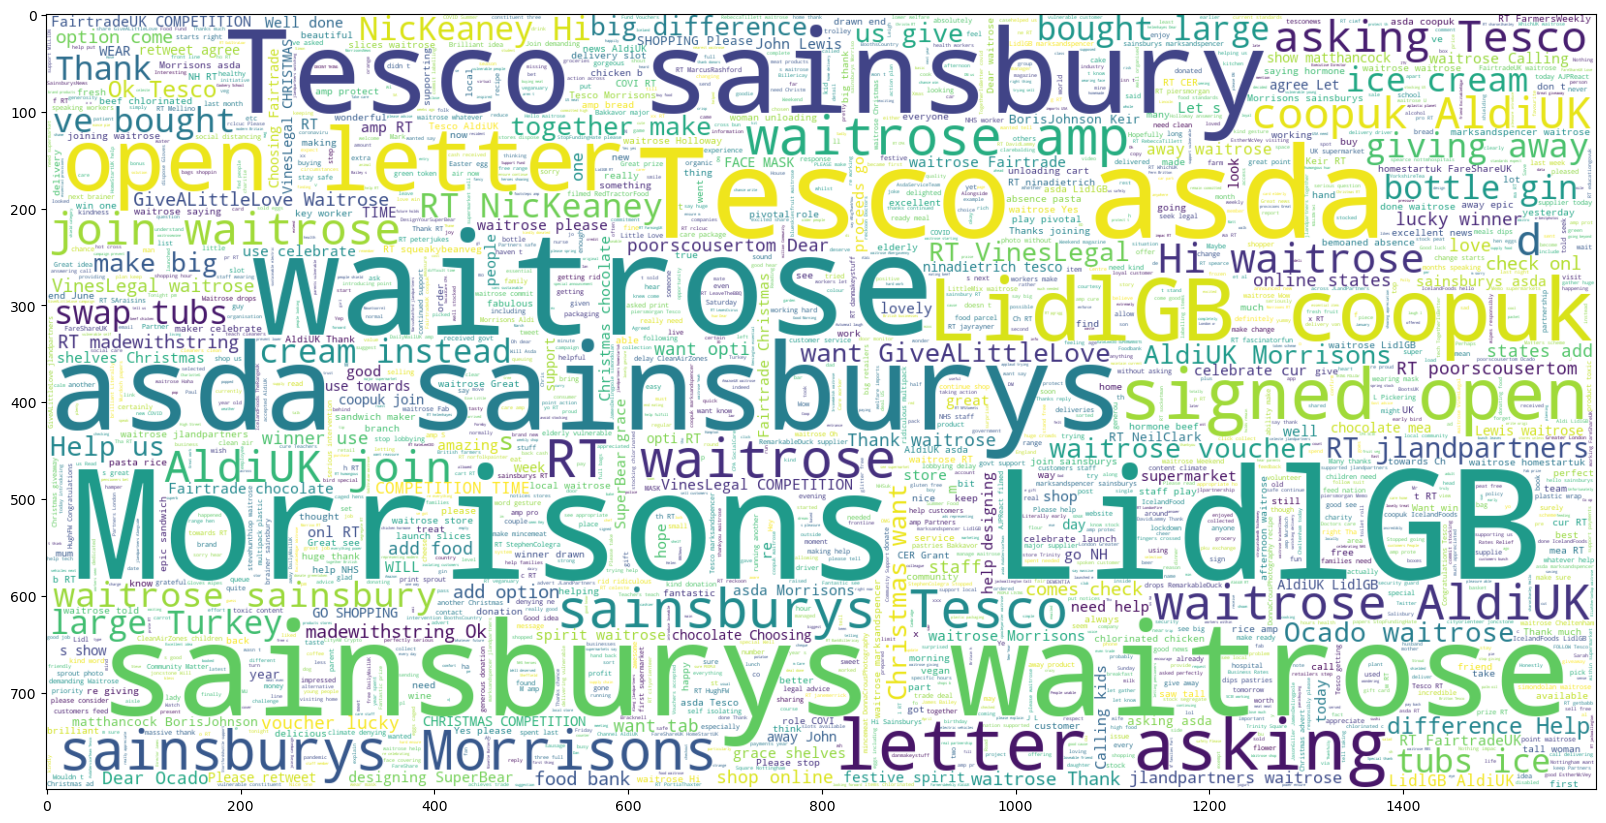

In [14]:
#Positive
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(waitrose_1[waitrose_1.sentiment == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

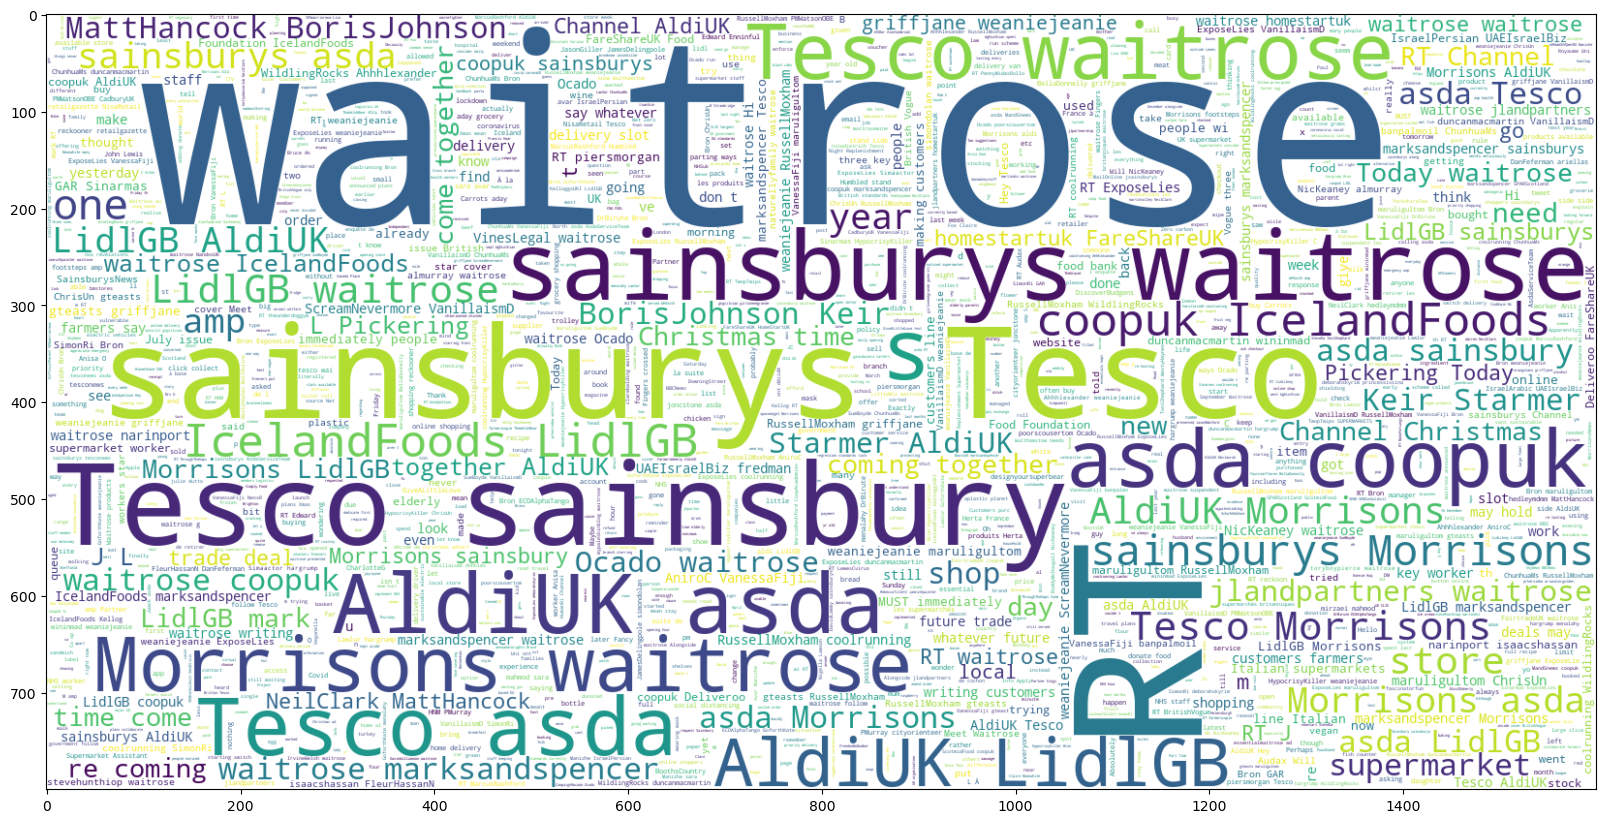

In [15]:
#Neutral
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(waitrose_1[waitrose_1.sentiment == 'Neutral'].text))
plt.imshow(wc , interpolation = 'bilinear')

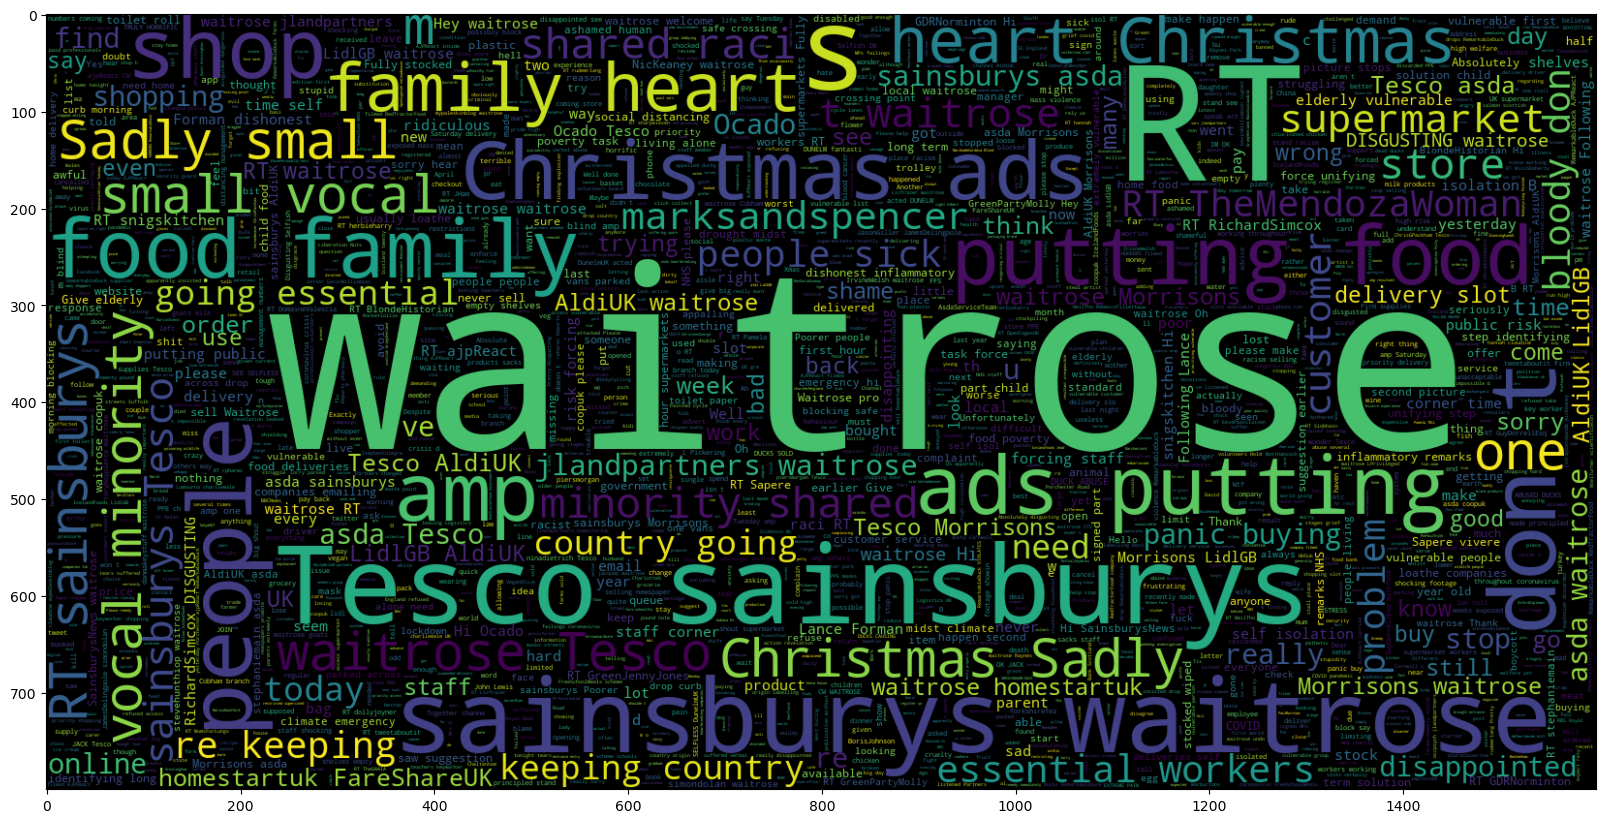

In [16]:
#Negative
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(waitrose_1[waitrose_1.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

C:\Users\ziyuxiong\AppData\Local\Temp\ipykernel_11912\4233664905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waitrose_1['compound'] = waitrose_1['polarity_scores'].apply(lambda x: x['compound'])
C:\Users\ziyuxiong\AppData\Local\Temp\ipykernel_11912\4233664905.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(waitrose_1['compound'], shade=True)


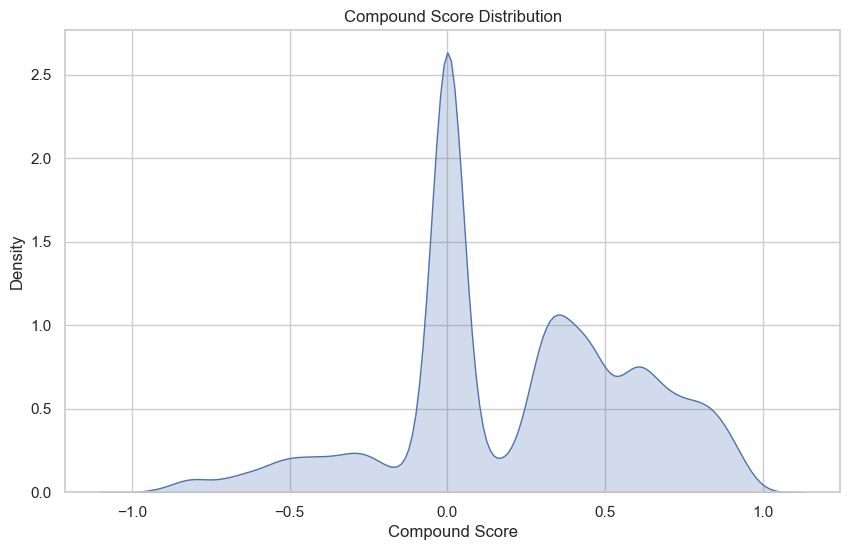

In [17]:
# extract the compound value into a new column
waitrose_1['compound'] = waitrose_1['polarity_scores'].apply(lambda x: x['compound'])

# Setting the style of a graphic
sns.set(style="whitegrid")

# Plotting the KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(waitrose_1['compound'], shade=True)
plt.title('Compound Score Distribution')
plt.xlabel('Compound Score')
plt.ylabel('Density')

# show
plt.show()

In [18]:
waitrose_1['text'].isnull().sum()

0

In [19]:
# The LDA topic model algorithm requires a document word matrix and a dictionary as the main inputs.
# A document-term matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. 
# In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms.
# A Dictionary is collection of all unique tokens present in documents.
# For generating the document-term matrix and dictionary, first we will convert our sentences into tokens using the fucntion mentioned below.
# stop_words = set(['the','a'])
def generate_tokens(tweet):
    words=[]
    for word in tweet.split(' '):
    # using the if condition because we introduced extra spaces during text cleaning
         # if word != '' and word not in stop_words:
        if word!='':
           words.append(word)
    return words
#storing the generated tokens in a new column named 'tokens'

waitrose_1['tokens']=waitrose_1.text.apply(generate_tokens)
waitrose_1.head()

C:\Users\ziyuxiong\AppData\Local\Temp\ipykernel_11912\1023590068.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waitrose_1['tokens']=waitrose_1.text.apply(generate_tokens)


text  \
0  RT @HelpThemHelpUs   Our friends @Potsandco pu...   
1  @HOOODINIIII @rohh @Samuel @sainsburys @Malcol...   
2  @waitrose wine delivered yesterday made violen...   
3  RT @jlandpartners  This Christmas want #GiveAL...   
4  RT @RebeccaTillett  @waitrose U K  achieves tr...   

                                     polarity_scores sentiment  compound  \
0  {'neg': 0.0, 'neu': 0.421, 'pos': 0.579, 'comp...  Positive    0.9291   
1  {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...  Positive    0.5499   
2  {'neg': 0.587, 'neu': 0.413, 'pos': 0.0, 'comp...  Negative   -0.7964   
3  {'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'comp...  Positive    0.4588   
4  {'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'comp...  Positive    0.2960   

                                              tokens  
0  [RT, @HelpThemHelpUs, Our, friends, @Potsandco...  
1  [@HOOODINIIII, @rohh, @Samuel, @sainsburys, @M...  
2  [@waitrose, wine, delivered, yesterday, made, ...  
3  [RT, @jlandpartners, This, Christmas, want, #G...  
4  [RT, @RebeccaTillett, @waitrose, U, K, achieve...

In [20]:
# Create a dictionary
def create_dictionary(words):
    return corpora.Dictionary(words)

id2word=create_dictionary(waitrose_1['tokens'])
print(id2word)

Dictionary<36440 unique tokens: ['@Ca…', '@HelpThemHelpUs', '@Potsandco', 'HEROES', 'Our']...>


In [21]:
#create a document_matrix
def create_document_matrix(tokens,id2word):
    corpus = []
    for text in tokens:
        corpus.append(id2word.doc2bow(text))
    return corpus

#passing the dataframe column having tokens and dictionary
corpus=create_document_matrix(waitrose_1['tokens'],id2word)
print(waitrose_1['tokens'][0])
print(corpus[0])

['RT', '@HelpThemHelpUs', 'Our', 'friends', '@Potsandco', 'puddings', 'donating', 'profits', 'sales', 'delicious', 'new', 'Tiramisu', 'HEROES', '@Ca…']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]


In [22]:
#Creating LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=10,
                                            random_state=100,
                                             )

In [26]:
#Visualisation of LDA model using the pyLDAvis library
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

C:\Users\ziyuxiong\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.238661  0.252385       1        1  18.887461
1      0.021547  0.235143       2        1  14.777044
3     -0.152540  0.012836       3        1  12.316076
7     -0.139705  0.280219       4        1  12.252316
8     -0.077469 -0.329067       5        1   8.931394
4     -0.310446  0.110168       6        1   8.551054
9      0.113108 -0.064142       7        1   6.612976
6     -0.246265 -0.165614       8        1   6.425856
5      0.206824 -0.295775       9        1   5.919423
2      0.346284 -0.036151      10        1   5.326400, topic_info=             Term         Freq         Total Category  logprob  loglift
67         @Tesco  4864.000000   4864.000000  Default  30.0000  30.0000
18    @sainsburys  5155.000000   5155.000000  Default  29.0000  29.0000
64     @Morrisons  3327.000000   3327.000000  Default  28.0000  28.0000
68          @asda  3182.000000   3182.000000  Default  27.0000  27.0000
108       @AldiUK  3258.000000   3258.000000  Default  26.0000  26.0000
...           ...          ...           ...      ...      ...      ...
1102      without    68.441129    119.080632  Topic10  -5.4959   2.3787
19      @waitrose   184.458999  20601.734834  Topic10  -4.5044  -1.7832
137            So    65.221522    285.583883  Topic10  -5.5441   1.4557
461         would    67.404105    625.773831  Topic10  -5.5111   0.7042
183             A    67.781632    688.481009  Topic10  -5.5056   0.6143

[594 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
4015      5  0.992729        #CHRISTMAS
4016      5  0.991250      #COMPETITION
2348      7  0.994263            #COVI…
853       2  0.982054    #CleanAirZones
35       10  0.996092  #GiveALittleLove
...     ...       ...               ...
2479      8  0.981923                 👎
3948      1  0.014067                 👏
3948      4  0.028133                 👏
3948      6  0.956532                 👏
4000      3  0.986054                 😉

[1325 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 8, 9, 5, 10, 7, 6, 3])